Special Topic - Machine Learning  - Semester Recap
--

Throughout the semester, my project was to create a sentiment analysis engine to classify pieces of text into one of three different categories: positive, netural and negative, achieving an accuracy rating of 80% or higher. In this notebook I detail each step of the process that I went through, throughout the semester. 

Obtaining a training dataset
--

My first task was to obtain a dataset (or combination of datasets) that contained pieces of text with sufficent amounts data in each of the three categories. I looked at various datasets from kaggle but found that the number of neutral samples was severly lacking compared to positive and negative.

 I decided on using an amazon review dataset that can be found here http://jmcauley.ucsd.edu/data/amazon/.

The dataset used on the website has the following description:
<i>"5-core (9.9gb) - subset of the data in which all users and items have at least 5 reviews (41.13 million reviews)."</i>

As the description states The dataset had over 9.9gb worth of data, however only a portion of the data was required for the model. The next section explains how I processed the dataset. The dataset is made up of a list of categories. The figure below shows how many samples belong to each category.

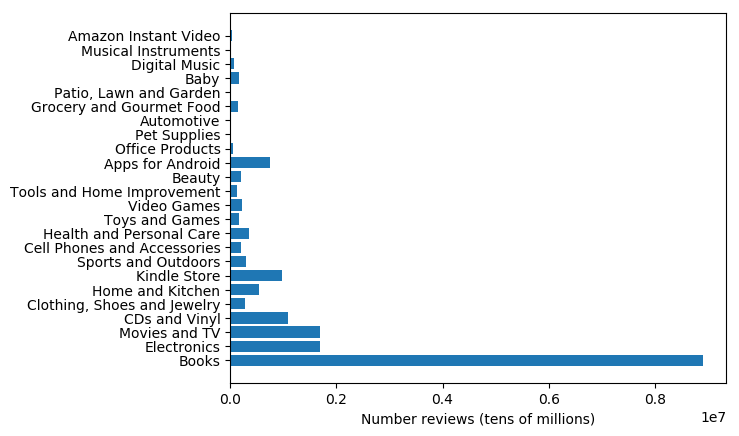

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
cats = ('Books', 'Electronics', 'Movies and TV', 'CDs and Vinyl', 'Clothing, Shoes and Jewelry', 'Home and Kitchen',
        'Kindle Store', 'Sports and Outdoors', 'Cell Phones and Accessories', 'Health and Personal Care', 'Toys and Games',
        'Video Games', 'Tools and Home Improvement', 'Beauty', 'Apps for Android', 'Office Products', 'Pet Supplies',
        'Automotive', 'Grocery and Gourmet Food', 'Patio, Lawn and Garden', 'Baby', 'Digital Music', 'Musical Instruments',
        'Amazon Instant Video')
y_pos = np.arange(len(cats))
n_reviews = [8898041, 1689188, 1697533, 1097592, 278677, 551682, 982619, 296337, 194439, 346355, 167597, 231780, 134476,
             198502, 752937, 53258, 15836, 20473, 151254, 13272, 160792, 64706, 10261, 37126]  
    
plt.barh(y_pos, n_reviews, align='center', alpha=1)
plt.yticks(y_pos, cats)
plt.xlabel('Number reviews (tens of millions)')
 
plt.show()

- Books (8,898,041 reviews)
- Electronics (1,689,188 reviews)
- Movies and TV (1,697,533 reviews)
- CDs and Vinyl (1,097,592 reviews)
- Clothing, Shoes and Jewelry (278,677 reviews)
- Home and Kitchen (551,682 reviews)
- Kindle Store (982,619 reviews)
- Sports and Outdoors (296,337 reviews)
- Cell Phones and Accessories (194,439 reviews)
- Health and Personal Care (346,355 reviews)
- Toys and Games (167,597 reviews)
- Video Games (231,780 reviews)
- Tools and Home Improvement (134,476 reviews)
- Beauty (198,502 reviews)
- Apps for Android (752,937 reviews)
- Office Products (53,258 reviews)
- Pet Supplies (157,836 reviews)
- Automotive (20,473 reviews)
- Grocery and Gourmet Food (151,254 reviews)
- Patio, Lawn and Garden (13,272 reviews)
- Baby (160,792 reviews)
- Digital Music (64,706 reviews)
- Musical Instruments	(10,261 reviews)
- Amazon Instant Video (37,126 reviews)

Processing the dataset
--

Each sample within the dataset is a user submited review 

An example of a sample from the dataset:

    {
      "reviewerID": "A2SUAM1J3GNN3B",
      "asin": "0000013714",
      "reviewerName": "J. McDonald",
      "helpful": [2, 3],
      "reviewText": "I bought this for my husband who plays the piano. He is having a wonderful time playing these old hymns. The music is at times hard to read because we think the book was published for singing from more than playing from. Great purchase though!",
      "overall": 5.0,
      "summary": "Heavenly Highway Hymns",
      "unixReviewTime": 1252800000,
      "reviewTime": "09 13, 2009"
    }

The only parts of the samples I was interested in were <i>reviewText</i> and <i>overall</i>, the rest was discarded. The reviewText being the data and overall being the labels. Only reviews with an overall of '1.0', '3.0' and '5.0' were used as well, '2.0' and '4.0' being discarded. Reviews with an overall of '1.0' were given a label of '-1' representing negative, '3.0' were given a label of '0' representing netural and '5.0' were given a label of '1' representing positive.

This new dataset resulted in a very unbalanced amount of samples between each category; The number of positive samples being greater than the number of neutral samples and the number of neutral being greater than negative. To solve this issue I took the total number of negative samples in each of the dataset's categories and only used that number of postive and neutral samples. This resulted in <i>789,327</i> positive, neutral and negative samples, creating a total dataset of <i>2,367,981</i> data points, reducing the dataset to a size of only 1.5gb.

Cleaning and preparing the dataset
--

Machine learning models do not work well with raw text. So before the was data ready to be fed into a model I had to convert it to numerical form.

<b>Cleaning</b>

First I cleaned each sample using a series of filters listed below from the standard python and genism libraries.

- Convert to lowercase
- Strip away URLs
- Remove tags
- Remove non-alphabetic characters
- Replace punctuation characters with spaces
- Remove digits
- Remove repeating whitespace characters (spaces, tabs, line breaks)
- Remove stopwords using set of 339 stopwords from Stone, Denis, Kwantes (2010).
- Remove words with length lesser than minsize = 3

<b>Dictionaries</b>

Next I mapped every unique word and the frequency of which that word occured in the cleaned dataset into a dictionary i.e {'good': 45000}. I then chose the top 30000 words to be included in the model and created two new dictionaries.

The first of these dictionaries mapping words to integers:

{'good': 52}

The other of these dictionaries mapping integers to words:

{52: 'good'}

These dictionaries are in the range from 1-30001 because zero is reserved as a placeholder for words in the dataset that are not present in the top 30000 and to help with padding samples so they are the same length.

<b>Preparing inputs</b>



Each sample was placed into a list of size 500. Samples that were less than 500 words were padded with zeroes and samples with more than 500 words had the remainder discarded. Using the dictionary to map words to integers, each word was replaced with its correct integer representation. Words that were not present in this dictionary were replaced with a 0.

Labels were one hot encoded into an array of lists of size 3, where each slot in the list is a 0 except one, which is a 1. For example a neutral label would be represented as [0,1,0].

This link explains what one encoding is and how to do it: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/. 

Creating a test dataset
--

The accuracy a model achieves during training is not an accurate measurement of how well it is able to generalize on the problem at hand. It could just be memorizing the training set. Therefore a test dataset is required to get a more precise measurement of how general the model really is. David and I constructed a test dataset of 100 hand picked pieces of text from a range of different websites. 

The dataset can be found at this link:https://docs.google.com/spreadsheets/d/1_KPk66j24N7sTi_1h5cgchNFDChDGHuRWUO7ur5lJIE/edit#gid=0

Establishing a baseline
--

A baseline is useful to compare future models to see improvement/lack of improvement. Randoming guessing the label of a sample, one would expect a result of around 33.333333% on this problem (because of 3 labels). A summary of my first baseline model is just below:

In [5]:
from test_data import get_test_data
from test_model import test

MAX_SIZE = 500
NUM_CATEGORIES = 3

model_path = 'BASELINE/model.json'
weights_path = 'BASELINE/model.h5'

x_test, y_test = get_test_data(MAX_SIZE, NUM_CATEGORIES)

test(model_path, weights_path, x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               256512    
_________________________________________________________________
dense_11 (Dense)             (None, 250)               128250    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32128     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 195       
Total params: 425,341
Trainable params: 425,341
Non-trainable params: 0
_________________________________________________________________
83/83 [==============================] - 0s 547us/step
test_loss: 1.0821354475366063 test acc: 0.4337349390409079


As you can see it didn't achieve very good results on the test dataset, only a miserable 43% accuracy. It is OK if your baseline has a poor result. It may indicate a particular difficulty with the problem or it may mean that your algorithms have a lot of room for improvement. In the case with this model it is a plain vanilla neural network and doesnt have the size or capablities of future models that I experimented without throughout the semester.

Performing a grid search
--

The parameter space for models is gigantic. Narrowing the search space to find optimal models is crucial to reduce the amount of time that is required. Two of the important layers in sentiment analysis are the embedding layer, a layer that creates densely packed vectors out of words, and the recurrent layers, which allow models to extend their memory. The grid search that I constructed was to find a good size for the embedding layer and useful number of recurrent layers to include.

The different sizes of the embedding layer I tried were 50, 100, 150, 200, 250 and 300. The numbers of recurrent layers I tried were 1-3, with two different types of recurrent layers, Gated Recurrent Unit (GRU) and Long Term Short Memory (LSTM). For each size of embedding, six models were trained; Three GRU models with 1,2,3 layers and three LSTM models with 1,2,3 layers, all of which had 100 units. This totaled 36 models and the results showed that an embedding size of 200 and three LSTM layers performed best achieving an accuracy of 54%.


Hyperparameter tuning
--

The next step to achieving a higher accuracy in a model is to alter the model in such ways as increasing/decreasing the size model, adding more layers, adding regularization or using different activation/loss functions.

First I tried adding regularization to the model by adding dropout layers. I used a dropout percentage of 30. This gave my model an increase in accuracy from 54% to 58%. More on dropout: https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

I then decided to increase the size of the LSTM layers. The layers were increased from static 100 units in each cell to a decreasing amount of 512 units in the first, 256 in the second and 128 in the third. Again this gave an increase in accuracy from 58% to 60%.

For the next model I added convolutional1D and Maxpooling layers. These layers are also commonly used in text based models. After the first LSTM layer, a convolutional1D layer with 64 filters and a kernel size of 8 was added. After the second LSTM layer, a convolutional1D layer with 32 filters and a kernel size of 4 was added. None layers were added after the third LSTM layer. Following each of the convolutional1D layers was a maxpooling layer with a pool size of 2. This resulted in a decrease in accuracy from 60%-54%.

It appeared to me that the size of the model was not the problem, so next I reverted to the second mentioned model above and this time added recurrent dropout to the LSTM cells. I used the same dropout percentage of 30. This resulted in a slight increase in accuracy from 60-61%.

Hardware Problems
--

Around week 6-7 of the semester, I discovered that the power supply on the computer I was using to train models was failing. This halted progress of developing models to after the mid semester break when new parts were purchased and the computer was back up and running. Training models on other polytech computers or my home computer was out of the question because the training times on those machines compared to on the gpu computer I was supplied was huge; Around 150-170 hours per model on standard machines compared to 8-12 on the gpu computer. Due to other classes assignments building up, I decided to retrain the final model listed above on the entire dataset to see if its accuracy improved.

Training on full dataset
--

Throughout the process of training models each model was not trained on the entire training set. The training set was split into two, 80% was used from training and 20% was used for validation. The purpose of this to monitor how well the model is doing during training on samples that it has not seen before and is also useful to discover how far into training the model is overfitting/underfitting.

More on using a validation set here: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

Description of overfitting/underfitting: https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

The model I trained on the entire dataset:

As you can see retraining the model resulted in an increase in accuracy, on the test set, from 61% with the 80%/20% training/validation split to xx% when trained on the entire dataset.

Semester takeaway
--

Throughout the semester I had many undiscovered bugs with code when preparing the dataset. For example I was incorrectly labeling the test set. This resulted in models, especially in the grid search, that gave results that were actually worse than what they actually were. Going forward, I have learnt, that I need to pay much more attention in the preparation stages before I get into modeling, instead of rushing in to get the job done.

